In [1]:
"""
This code module primary write/composition team billie, Will
"""

'\nThis code module primary write/composition team billie, Will\n'

In [2]:
import pandas as pd
from pandas_datareader import data as pdr   # https://pandas-datareader.readthedocs.io/en/latest/
from pathlib import Path
from pandas import Timestamp as tstamp

import numpy as np

import matplotlib.pyplot as plt

# from datetime module
# Import date and timedelta class
from datetime import date
from datetime import timedelta

import scipy as sci
from scipy import stats
import scipy.optimize as sco

import yfinance as yf                       # https://pypi.org/project/yfinance/

from pypfopt import(                        # https://pyportfolioopt.readthedocs.io/en/latest/index.html
    EfficientFrontier,
    risk_models,
    expected_returns
)
from pypfopt.discrete_allocation import(    # https://pyportfolioopt.readthedocs.io/en/latest/index.html
    DiscreteAllocation,
    get_latest_prices
)

import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [3]:
# IMPORT DATAFRAME - CORE DATA from conyea.py
from conyea import get_raw_data

### specifiy date range for data

In [4]:
# Set start and end dates of 3 years back from your current date
end_date = pd.to_datetime('today')
start_date = end_date - np.timedelta64(5, 'Y')     #  5 years
start, end = start_date, end_date
start, end                                         # verify our date range

(Timestamp('2017-10-15 05:21:12.344458'),
 Timestamp('2022-10-15 10:27:12.344458'))

In [5]:
# Basket
asset_list = ['AAPL', 'IBM', 'TSLA', 'GOOGL']
market = ['^GSPC']   # adding S&P 500 index (^GSPC)for use in beta weighting  
beta_list = market + asset_list

In [6]:
# raw dataframe closing prices of index and assets
raw_frame_close = get_raw_data(asset_list, market, start, end)
raw_frame_close.sample()

Symbols,^GSPC,AAPL,IBM,TSLA,GOOGL
Date,,,,,
2021-10-13,4363.799805,140.910004,134.569794,270.359985,137.582001


In [7]:
trade_days_year = 252  # variable to set number of trading days per year
hurdle_rate = 0.0275 # is variable for risk free rate ~ 2-3%

In [8]:
# IMPORT DATAFRAME - CORE ANALYTICS from comp_analytics.py
from comp_analytics import get_comp_analytics_data

In [9]:
# OUTPUTS CORE ANALYTICS DATA
raw_df, returns, mean_returns, standard_deviation_returns, rolling_standard_deviation_returns, annualized_std, log_returns, annual_average_returns, cumulative_returns_plus, cumulative_returns, asset_correlation, sharpe_ratios, stock_covariance = get_comp_analytics_data(raw_frame_close, trade_days_year)

### Next block starts series of test blocks - disposable once all works well and/or at finalization cleanup

In [10]:
print(f'Sample stock data frame \n {raw_df.sample()}')

Sample stock data frame 
 Symbols           ^GSPC        AAPL         IBM        TSLA       GOOGL
Date                                                                   
2021-11-04  4680.060059  150.960007  120.849998  409.970001  148.267502


In [11]:
print(f'Sample daily returns data frame \n {returns.sample()}')

Sample daily returns data frame 
 Symbols        ^GSPC      AAPL       IBM      TSLA     GOOGL
Date                                                        
2021-07-26  0.002382  0.002895  0.010117  0.022133  0.007668


In [12]:
print(f'Mean returns \n {mean_returns}')

Mean returns 
 Symbols
^GSPC    0.000359
AAPL     0.001200
IBM      0.000029
TSLA     0.002544
GOOGL    0.000698
dtype: float64


In [13]:
print(f'Standard deviation of returns\n {standard_deviation_returns}')

Standard deviation of returns
 Symbols
^GSPC    0.013458
IBM      0.017441
GOOGL    0.019073
AAPL     0.020572
TSLA     0.040494
dtype: float64


In [14]:
print(f'Rolling standard deviation of returns \n {rolling_standard_deviation_returns}')

Rolling standard deviation of returns 
 Symbols        ^GSPC      AAPL       IBM      TSLA     GOOGL
Date                                                        
2017-10-16       NaN       NaN       NaN       NaN       NaN
2017-10-17       NaN       NaN       NaN       NaN       NaN
2017-10-18       NaN       NaN       NaN       NaN       NaN
2017-10-19       NaN       NaN       NaN       NaN       NaN
2017-10-20       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...
2022-10-10  0.017467  0.025527  0.016733  0.034249  0.020876
2022-10-11  0.017074  0.023499  0.016388  0.033728  0.020806
2022-10-12  0.014832  0.020354  0.015649  0.033469  0.016978
2022-10-13  0.016181  0.021828  0.017833  0.032496  0.017334
2022-10-14  0.016702  0.022476  0.017723  0.034823  0.017636

[1259 rows x 5 columns]


In [15]:
print(f'Annualized standard deviation of returns \n {annualized_std}')

Annualized standard deviation of returns 
 Symbols
^GSPC    0.213640
IBM      0.276867
GOOGL    0.302778
AAPL     0.326576
TSLA     0.642819
dtype: float64


In [16]:
print(f'Sample stock log returns \n {log_returns.sample()} \n')

Sample stock log returns 
 Symbols        ^GSPC      AAPL       IBM      TSLA    GOOGL
Date                                                       
2019-07-01  0.007643  0.018175  0.014256  0.016466  0.01576 



In [17]:
print(f'Annual average returns \n {annual_average_returns}')

Annual average returns 
 Symbols
IBM      0.007195
^GSPC    0.090493
GOOGL    0.175856
AAPL     0.302274
TSLA     0.641126
dtype: float64


In [18]:
print(f'Cumulative returns plus original invest \n {cumulative_returns_plus}')

Cumulative returns plus original invest 
 Symbols        ^GSPC      AAPL       IBM      TSLA     GOOGL
Date                                                        
2017-10-16       NaN       NaN       NaN       NaN       NaN
2017-10-17  1.000673  1.003690  0.998025  1.014689  1.001635
2017-10-18  1.001415  0.999249  1.086495  1.025813  1.003359
2017-10-19  1.001744  0.975607  1.095825  1.003451  0.992560
2017-10-20  1.006870  0.977295  1.103794  0.984313  0.995760
...              ...       ...       ...       ...       ...
2022-10-10  1.412392  3.513135  0.838837  9.539076  1.939070
2022-10-11  1.403184  3.477108  0.839194  9.262693  1.925596
2022-10-12  1.398567  3.461096  0.837555  9.294353  1.933125
2022-10-13  1.434881  3.577433  0.867618  9.486024  1.962847
2022-10-14  1.400928  3.462097  0.855151  8.770251  1.913311

[1259 rows x 5 columns]


In [19]:
print(f'Cumulative returns less original invest \n {cumulative_returns}')

Cumulative returns less original invest 
 Symbols        ^GSPC      AAPL       IBM      TSLA     GOOGL
Date                                                        
2017-10-16       NaN       NaN       NaN       NaN       NaN
2017-10-17  0.000673  0.003690 -0.001975  0.014689  0.001635
2017-10-18  0.001415 -0.000751  0.086495  0.025813  0.003359
2017-10-19  0.001744 -0.024393  0.095825  0.003451 -0.007440
2017-10-20  0.006870 -0.022705  0.103794 -0.015687 -0.004240
...              ...       ...       ...       ...       ...
2022-10-10  0.412392  2.513135 -0.161163  8.539076  0.939070
2022-10-11  0.403184  2.477108 -0.160806  8.262693  0.925596
2022-10-12  0.398567  2.461096 -0.162445  8.294353  0.933125
2022-10-13  0.434881  2.577433 -0.132382  8.486024  0.962847
2022-10-14  0.400928  2.462097 -0.144849  7.770251  0.913311

[1259 rows x 5 columns]


In [20]:
print(f'Correlation matrix \n {asset_correlation}')

Correlation matrix 
 Symbols     ^GSPC      AAPL       IBM      TSLA     GOOGL
Symbols                                                  
^GSPC    1.000000  0.792783  0.662640  0.475974  0.796291
AAPL     0.792783  1.000000  0.447985  0.463502  0.690314
IBM      0.662640  0.447985  1.000000  0.225527  0.455472
TSLA     0.475974  0.463502  0.225527  1.000000  0.412108
GOOGL    0.796291  0.690314  0.455472  0.412108  1.000000


In [21]:
print(f'Sharpe ratios \n {sharpe_ratios}')

Sharpe ratios 
 Symbols
IBM     -0.073339
^GSPC    0.294855
GOOGL    0.489984
AAPL     0.841379
TSLA     0.954586
dtype: float64


In [22]:
print(f'Sample stock covariance \n {stock_covariance.sample()}\n')

Sample stock covariance 
 Symbols     ^GSPC      AAPL       IBM      TSLA     GOOGL
Symbols                                                  
^GSPC    0.000181  0.000219  0.000156  0.000259  0.000204



### The block ABOVE this black ends series of test blocks - disposable once all works well and/or at finalization cleanup

### Monte Carlo

### Beta weighting

### Value at risk (VaR) and conditional value at risk (CVar)
'Value at risk (VaR) is a statistic that quantifies the extent of possible financial losses within a firm, portfolio, or position over a specific time frame.'

https://www.investopedia.com/terms/v/var.asp

'CVaR is derived by taking a weighted average of the “extreme” losses in the tail of the distribution of possible returns, beyond the value at risk (VaR) cutoff point.' 

https://www.investopedia.com/terms/c/conditional_value_at_risk.asp#:~:text=What%20Is%20Conditional%20Value%20at,risk%20an%20investment%20portfolio%20has.

In [23]:
# 'Market'as a whole is S&P 500 index = GSPC
# DIRECT BETA CALCULATION =>      covariance(GSPC, stock) /  variance(GSPC)  ; note variance of S&P500 = covariance(S&P500, S&P500)  
# Input data = log_returns and raw_df

In [24]:
# Direct calculations for beta coefficients via capital asset pricing model (CAPM) definition
# Beta
def direct_beta(log_returns):
    np_array = raw_df.values
    # S&P 500 index (^GSPC) is in first column, 0
    m = np_array[:,0]
    beta = []
    for index, col in enumerate(raw_df):
        if index > 0:
            # asset returns indexed by index
            s = np_array[:,index]
            # calculating covariance between assets and S&P 500 index (GSPC)
            covariance = np.cov(s, m)
            beta.append(covariance[0,1] / covariance[1,1])

    return pd.Series(beta, raw_df.columns[1:], name = 'Beta')

beta = direct_beta(log_returns)

In [25]:
display(raw_df.head())

Symbols,^GSPC,AAPL,IBM,TSLA,GOOGL
Date,,,,,
2017-10-16,2557.639893,39.970001,140.372849,23.373333,50.467499
2017-10-17,2559.360107,40.117500,140.095596,23.716667,50.549999
2017-10-18,2561.260010,39.939999,152.514343,23.976667,50.637001
2017-10-19,2562.100098,38.994999,153.824097,23.454000,50.091999
2017-10-20,2575.209961,39.062500,154.942642,23.006666,50.253502


# asset_daily_returns = <dataframe_name>.drop(columns = '<market/index name>', inplace = True)
assets_only_df = raw_df.drop(columns = '^GSPC', inplace = True)

rename(columns={"A": "a", "B": "b", "C": "c"}, errors="raise")

In [26]:
# Input data = mean_returns

In [27]:
# weighting
# random weighting
weight = np.random.random(len(mean_returns))   # derives number between 0 and 1
weight /= np.sum(weight)
print(weight)   # confirmation output

[0.07809197 0.21500049 0.25674726 0.14583109 0.30432919]


In [28]:
# Monte Carlo Simulattion Generator - proper

In [29]:
# number of simulations
mc_sims = 100
# timeframe in days
T = 365

In [30]:
mean_m = np.full(shape=(T, len(weight)), fill_value = mean_returns)   #  shape is T(timeframe days) and number of weight
mean_m = mean_m.T     # transpose

In [31]:
# array/matrix to store the information
portfolio_simulations = np.full(shape=(T, mc_sims), fill_value = 0.0)  # shape is factor of time and number of sims; fill = 0.0 allows for floats

In [32]:
display(portfolio_simulations)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# simulate initial value
starting_portfolio_value = 10000

In [34]:
#.     check cholesky decomposition triangle matrix
for m in range(0, mc_sims):
    # Monte Carlo loops
    Z = np.random.normal(size = (T, len(weight)))   # T x number assets uncorrelated random variables from norm distribution
    L = np.linalg.cholesky(stock_covariance)              # lower triangle for cholesky decomp
    daily_returns = mean_m + np.inner(L, Z)
    portfolio_simulations[:,m] = np.cumprod(np.inner(weight, daily_returns.T)+1) * starting_portfolio_value

<function matplotlib.pyplot.show(close=None, block=None)>

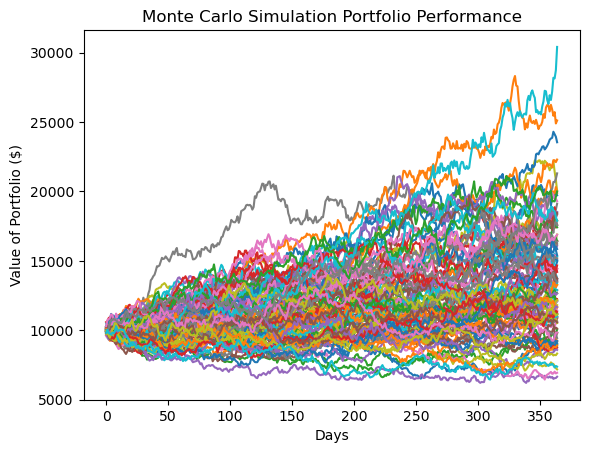

In [35]:
# visualize
plt.plot(portfolio_simulations)
plt.ylabel('Value of Portfolio ($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation Portfolio Performance')
plt.show

In [36]:
# Value at risk (VaR) and conditional value at risk (CVar)

In [37]:
def monte_carlo_var(returns, alpha = 5):    #alpha default fifth percentile
    # input: panda series of returns
    # output: percentile on return distribution to a given confidence level alpha
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError('expected a panda data series')

In [38]:
# conditional value at risk - expected shortfall once passed beyond the percentile of interest (i.e. 5th)
#                             to a certain confidence interval what is our expected shortfall below that percentile
def monte_carlo_cvar(returns, alpha = 5):    #alpha default fifth percentile
    # input: panda series of returns
    # output: mc_conditional_value_risk or expected shortfall to a given confidence level alpha
    if isinstance(returns, pd.Series):
        below_value_at_risk = returns <= monte_carlo_var(returns, alpha = alpha)
        return returns[below_value_at_risk].mean()
    else:
        raise TypeError('expected a panda data series')

In [39]:
#
portfolio_results = pd.Series(portfolio_simulations[-1,:])

In [40]:
value_at_risk = starting_portfolio_value - monte_carlo_var(portfolio_results, alpha = 5)
conditional_value_at_risk = starting_portfolio_value - monte_carlo_cvar(portfolio_results, alpha = 5)

print('Value at Risk ${}'.format(round(value_at_risk,2)))
print('Conditional Value at Risk ${}'.format(round(conditional_value_at_risk,2)))

Value at Risk $1431.12
Conditional Value at Risk $2703.71


### END of above

In [41]:
# asset_daily_returns = <dataframe_name>.drop(columns = '<market/index name>', inplace = True)
assets_only_df = raw_df.drop(columns = '^GSPC', inplace = True)

### PyPortfolioOpt library

alternative approach using package to streamline data process and provide for efficient frontier

In [42]:
# PACKAGE CALCULATIONS
# PyPortfolioOPT https://pyportfolioopt.readthedocs.io/en/latest/index.html

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(raw_frame_close)   # mean returns
S = risk_models.sample_cov(raw_frame_close)                     # sample covariance 

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
type(ef)
raw_weights = ef.max_sharpe()
type(raw_weights)
cleaned_weights = ef.clean_weights()
type(cleaned_weights)
print(cleaned_weights)
ef.save_weights_to_file('weights.csv')  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)
performance = ef.portfolio_performance(verbose=True)  # extractable tuple of Expected annual returns, Annual volatility, Sharpe Ratio

OrderedDict([('AAPL', 0.65331), ('IBM', 0.0), ('TSLA', 0.34669), ('GOOGL', 0.0)])
OrderedDict([('AAPL', 0.65331), ('IBM', 0.0), ('TSLA', 0.34669), ('GOOGL', 0.0)])
Expected annual return: 37.3%
Annual volatility: 37.3%
Sharpe Ratio: 0.95
Expected annual return: 37.3%
Annual volatility: 37.3%
Sharpe Ratio: 0.95


In [43]:
latest_prices = get_latest_prices(raw_frame_close)

da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AAPL': 47, 'TSLA': 17}
Funds remaining: $11.31


### This is manual/~non-package approach 

In [44]:
# FIRST PERFORMANCE
# performance
def portfolio_performance(weight, mean_returns, covariance, hurdle_rate = 0.0275):
    returns = np.sum(mean_returns * weight)*252   # (mean_returns * weight).sum()*252
    std_dev = np.sqrt(np.dot(weight.T, np.dot(covariance, weight))) * np.sqrt(252)    #  portfolio variance
    return returns, std_dev

In [45]:
# SECOND PERFORMANCE
def negative_sharpe_rat(weight, mean_returns, covariance, hurdle_rate = 0.0275):
    p_returns, p_standard_dev = portfolio_performance(weight, mean_returns, covariance)
    return -1*(p_returns - hurdle_rate) / p_standard_dev                

In [46]:
# THIRD PERFORMANCE
def optimal_sharpe_rat(mean_returns, covariance, hurdle_rate=0.03, boundaries_set = (0,1)):
    "maximize sharpe rat or minimize negative sharpe rat via portfolio weighting"
    number_securities = len(mean_returns)
    args = (mean_returns, covariance, hurdle_rate)
    boundaries = ({'type': 'eq', 'fun': lambda x: np.sum(x) -1})     # see np scipy 'SLSQP', this is ~lambda weight
    reaches = boundaries_set
    barriers = tuple(reaches for security in range(number_securities))
    result = sco.minimize(negative_sharpe_rat(weight, number_securities* [1.0/number_securities], args = args, method = 'SLSQP', barriers = barriers, boundaries = boundaries))   
    return result


In [47]:
# PORTFOLIO VARIANCE
def portfolio_variance(weight, mean_returns, covariance):
    return portfolio_performance(weight, mean_returns, covariance)[1]

In [48]:
def minimize_variance(mean_returns, covariance, boundaries_set = (0,1)):
    "maximize volatility through adjusting security weighting in portfolio"
    number_securities = len(mean_returns)
    args = (mean_returns, covariance)
    boundaries = ({'type': 'eq', 'fun': lambda x: np.sum(x) -1})
    reaches = boundaries_set
    barriers = tuple(reaches for security in range(number_securities))
    result = sco.minimize(portfolio_variance, number_securities* [1.0/number_securities], args = args,
                                   method = 'SLSQP', barriers = barriers, boundaries = boundaries)   
    return result

In [49]:
def computed_results(mean_returns, covariance, hurdle_rate=0.03, boundaries_set = (0,1)):
                          
    # Optimal Sharpe Ratio Portfolio
    portfolio_optimal_sharpe_rat = optimal_sharpe_rat(mean_returns, covariance)
    returns_optimal_sharpe_rat, standard_dev_optimal_sharpe_rat = portfolio_performance(portfolio_optimal_sharpe_rat['x'], mean_returns, covariance) 
    allocation_optimal_sharpe_rat = pd.DataFrame(portfolio_optimal_sharpe_rat['x'], index=mean_returns.index, columns=['allocation'])
    allocation_optimal_sharpe_rat.allocation = [round(i*100, 0) for i in allocation_optimal_sharpe_rat.allocation]                      
                          
    # Least Risk Portfolio                      
    volume_limited_portfolio = minimize_variance(mean_returns, covariance) 
    returns_volume_limited, standard_dev_volume_limited = portfolio_performance(volume_limited['x'], mean_returns, covariance)   
    allocation_volume_limited = pd.DataFrame(volume_limited_portfolio['x'], index=mean_returns.index, columns=['allocation']) 
    allocation_volume_limited.allocation = [round(i*100, 0) for i in allocation_optimal_sharpe_rat.allocation]                      
    
    # Efficient Frontier
    efficient_composition = []
    target_returns = np.linspace(returns_volume_limited, returns_optimal_sharpe_rat, 20)
    for target in target_returns:
        efficient_composition.append(efficient_opt(mean_returns, covariance, target,['fun']))   
    
    returns_optimal_sharpe_rat, standard_dev_optimal_sharpe_rat = round(returns_optimal_sharpe_rat*100,2), round(standard_dev_optimal_sharpe_rat*100,2)                      
    returns_volume_limited, standard_dev_volume_limited = round(returns_volume_limited*100, 2), round(standard_dev_volume_limited*100, 2)                      
                          
    return returns_optimal_sharpe_rat, 
    standard_dev_optimal_sharpe_rat, 
    allocation_optimal_sharpe_rat, 
    returns_volume_limited, 
    standard_dev_volume_limited, 
    allocation_volume_limited, 
    efficient_composition, target_returns              

In [50]:
# BEAUTIFUL, BUT I HAVENT GOTTEN TO WORK AND DINESH SAID HE HAS SOME VIZ HE WANTS USE
def ef_plot(mean_returns, covariance, hurdle_rate=0.0275, boundaries_set = (0,1)):
    returns_optimal_sharpe_rat, standard_dev_optimal_sharpe_rat, allocation_optimal_sharpe_rat, returns_volume_limited, standard_dev_volume_limited, allocation_volume_limited, efficient_composition, target_returns = computed_results(mean_returns, covariance, hurdle_rate, boundaries_set)                   
                          
    # Optimal Sharpe Ratio
    optimal_sharpe_rat = go.scatter(
         name = 'Optimal Sharpe Ratio',
         mode = 'markers',
         x = [standard_dev_optimal_sharpe_rat],
         y = [returns_optimal_sharpe_rat],
         marker = dict(color='magenta', size=15, line=dict(width=4, color='blue'))
    )
                          
    # Least Risk Volume
    limited_volume = go.scatter(
         name = 'Minimum Risk',
         mode = 'markers',
         x = [standard_dev_volume_limited],
         y = [returns_volume_limited],
         marker = dict(color='red', size=15, line=dict(width=4, color='blue'))
    )                          
                          

    # Efficient Frontier
    graph_ef = go.scatter(
         name = 'Efficient Frontier',
         mode = 'liness',
         x = [round(ef_std * 100, 2) for ef_std in efficient_composition],
         y = [round(target * 100, 2) for target in target_returns],
         line = dict(color='black', width=3, dash = 'dotdash' color='blue')
    )                          
                                   
                          
    traces = ['optimal_sharpe_rat', 'limited_volume', 'graph_ef']                     
    configuration = go.layout(
         title = 'Modern Portfolio Thoery - Optimization with Efficient Frontier',
         yaxis = dict(title = 'Percent Annual Return'),
         xaxis = dict(title ='Percent Annual Volatility'),
         showlegend = True,
         legend = dict(
             x = 0.75, y = 0, traceorder = 'normal',
             bgcolor = '#E2E2E2',                           # gray background
             bordercolor = 'black',
             borderwidth = 2),
         width = 800,
         height = 600)

                          
                          
    fig = go.figure(data=traces, layout = configuration)                    
    return fig.show()                     
                          
                          
                          
                          
stocklist = ['GOOGL', 'AAPL', 'TSLA', 'IBM']
stocks = stocklist

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365)

weight = np.array([0.3, 0.3, 0.3, 0.1])

mean_returns, covariance = gets_the_data(stocks, start = start_date, end = end_date)
#mean_returns, covariance = gets_the_data(stocks, start = start_date, end = end_date)
returns, std_dev = portfolio_performance(weight, mean_returns, covariance)

                       
                          
# result = optimal_sharpe_rat(mean_returns, covariance, weight, hurdle_rate=0.03)  
result =  optimal_sharpe_rat(mean_returns, covariance)   
opt_sharpe, opt_weight = result['fun'], result['x']                           
print(opt_sharpe, opt_weight)  
                          
                          
                          
                          
minimal_var_result= minimize_variance(mean_returns, covariance)
min_var, min_var_weight = minimal_var_result['fun'], minimal_var_result['x']
          
print(returns, std_dev)
          

ef_plot(mean_returns, covariance)







SyntaxError: invalid syntax (2731995376.py, line 30)

### MCForecast Monte Carlo stuff  - have NOTHING functional

In [ ]:
from MCForecastTools import MCSimulation

In [ ]:
# Configure the Monte Carlo simulation to forecast 1 years cumulative returns (i.e. 1:5)
# The weights should be split ??????.
# Run 500 samples.
prices_1yr_5yr_df = raw_frame_close

mc_four_six_1yr_5yr_weight = MCSimulation(
    portfolio_data = prices_1yr_5yr_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*1
)

# Review the simulation input data
mc_four_six_1yr_5yr_weight.portfolio_data.head()

### End Monte Carlo stuff